# Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DecisionSupportSystem-V2/Heart Disease.xlsx')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


## Kiểm tra dữ liệu có đủ yêu cầu không


1.   Số thuộc tính, số dòng
2.   Thông tin về các thuộc tính

-> Dữ liệu bao gồm 18 trường dữ liệu, 319795 dòng



In [3]:
df.shape

(319795, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
319790    False
319791    False
319792    False
319793    False
319794    False
Length: 319795, dtype: bool

In [7]:
# Tạo một biểu đồ heatmap, mối quan hệ trong dữ liệu về bệnh tim mạcht.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot = True)

ValueError: could not convert string to float: 'No'

<Axes: xlabel='Smoking', ylabel='count'>

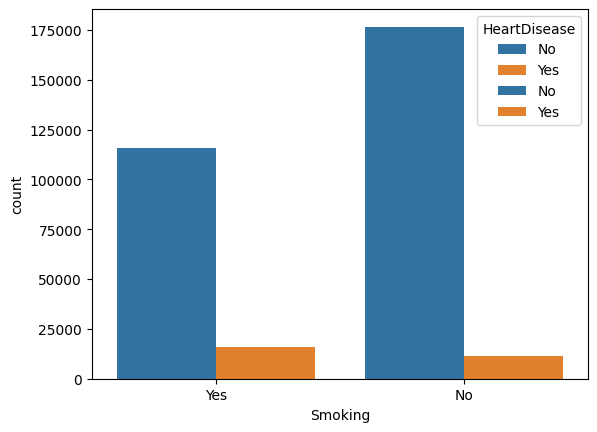

In [8]:
# Tạo một biểu đồ countplot để đếm số lượng quan sát cho mỗi giá trị của biến "Smoking".
sns.countplot(x="Smoking", hue="HeartDisease", data=df)
sns.countplot(x = "Smoking", hue= "HeartDisease",data = df)

# Preprocessing

In [9]:
data = df[df['HeartDisease']=='Yes']
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No
10,Yes,34.30,Yes,No,No,30,0,Yes,Male,60-64,White,Yes,No,Poor,15,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10,0,Yes,Male,75-79,White,Yes,Yes,Poor,4,No,No,Yes
42,Yes,25.06,No,No,No,0,0,Yes,Female,80 or older,White,Yes,No,Good,7,No,No,Yes
43,Yes,30.23,Yes,No,No,6,2,Yes,Female,75-79,White,Yes,Yes,Fair,8,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319765,Yes,38.45,No,No,Yes,30,15,Yes,Female,55-59,Hispanic,Yes,Yes,Poor,6,Yes,No,No
319767,Yes,36.21,Yes,No,No,0,0,Yes,Female,75-79,Hispanic,Yes,Yes,Good,8,No,No,No
319781,Yes,37.12,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,7,No,No,No
319786,Yes,33.20,Yes,No,No,0,0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8,Yes,No,No


In [10]:
# Đếm số lượng quan sát cho mỗi giá trị của biến 'Smoking' trong dữ liệu đã lọc
smoke = data['Smoking'].value_counts()
smoke


Smoking
Yes    16037
No     11336
Name: count, dtype: int64

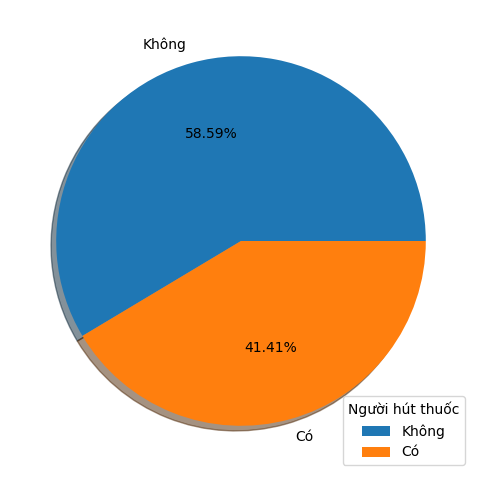

In [11]:
# Tạo biểu đồ pie chart để biểu diễn phần trăm số lượng người hút thuốc và không hút thuốc trong nhóm mắc bệnh tim mạch
labels = ["Không","Có"]
plt.figure(figsize = (6,6))
plt.pie(smoke,labels = labels,autopct='%2.2f%%',shadow=True)
plt.legend(title='Người hút thuốc',loc='lower right')
plt.show()

In [12]:
def bar_chart(feature):
  live = df [df['HeartDisease']=='No'][feature].value_counts()
  die = df[df['HeartDisease']=='Yes'][feature].value_counts()
  df1 = pd.DataFrame([live,die])
  df1.index = ['Song','Tu vong']
  df1.plot(kind='bar',figsize=(10,5))


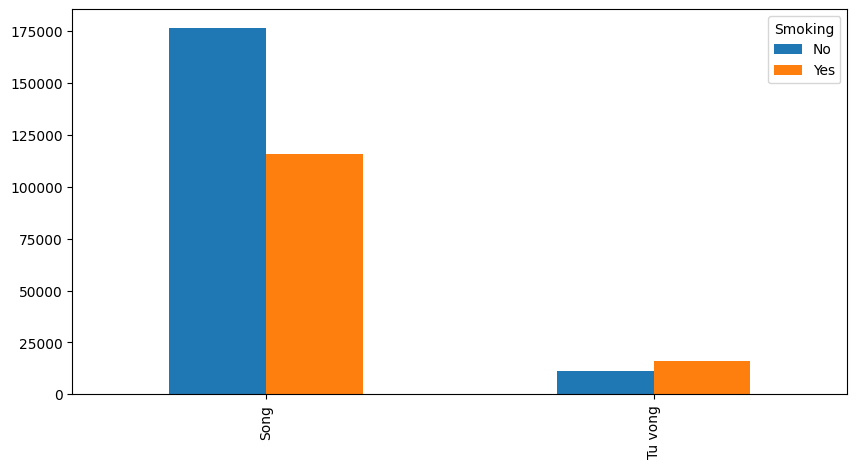

In [13]:
# Vẽ biểu đồ bar chart để so sánh số lượng quan sát của feature giữa nhóm sống sót và nhóm tử vong
bar_chart('Smoking')

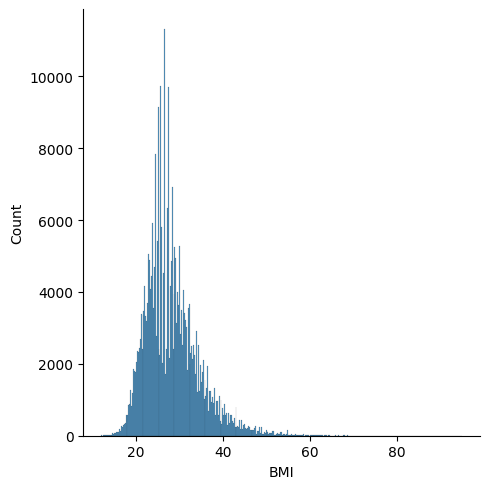

In [14]:
# Tạo biểu đồ phân phối (distribution plot) để hiển thị phân phối của chỉ số BMI
sns.displot(df['BMI'])

In [15]:
def kde(x):
    facet=sns.FacetGrid(df,hue="HeartDisease",aspect=4)
    # Ánh xạ hàm kdeplot của seaborn lên mỗi phần tử của lưới, mỗi phần tử biểu diễn mật độ phân phối của biến x
    facet.map(sns.kdeplot,x,shade=True)
    facet.set(xlim=(df[x].min(),df[x].max()))
    facet.add_legend()
    plt.show()

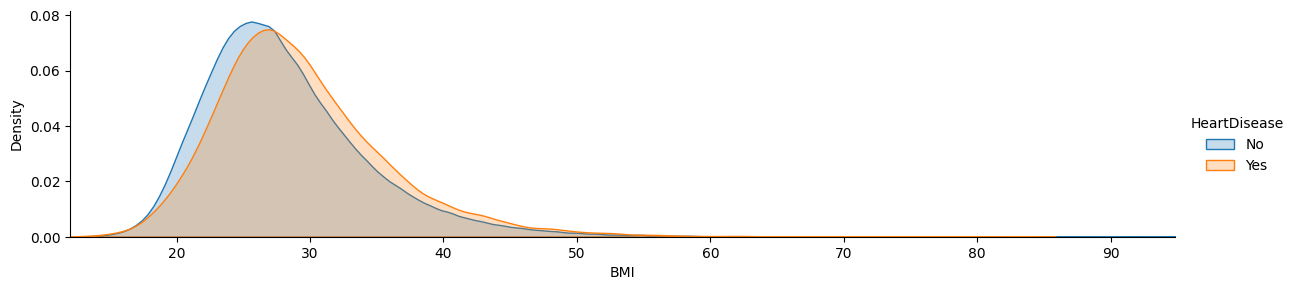

In [16]:
# Mật độ phân phối của chỉ số BMI được phân biệt theo trạng thái của bệnh tim mạch
kde('BMI')

# Tiền xử lý dữ liệu

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,accuracy_score
from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder()
# Danh sách các biến cần chuyển đổi từ dạng phân loại sang dạng số nguyên
list=['HeartDisease','Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
for i in list:
    df[i]=le.fit_transform(df[i])

In [19]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


In [20]:
# Tách dataframe thành hai phần: x chứa tất cả các cột ngoại trừ 'HeartDisease', y chứa cột 'HeartDisease' (biến mục tiêu)
x=df.drop(columns=['HeartDisease'])
y=df['HeartDisease']
x.sample(10)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
295465,32.28,1,0,0,0,0,0,0,10,5,0,1,2,10,0,0,0
296307,32.39,0,0,0,0,0,0,1,5,1,0,1,2,8,0,0,0
164278,27.05,0,0,0,7,0,0,1,1,5,0,1,4,8,0,0,0
147549,23.78,1,0,0,0,0,0,0,8,5,0,1,4,8,0,1,0
65335,15.60,1,1,1,30,0,1,1,12,4,2,0,3,10,0,0,0
159271,22.38,1,0,0,0,0,0,1,3,5,0,1,4,8,0,0,0
309357,21.30,1,0,0,0,0,0,1,2,5,0,1,4,6,0,0,0
279602,24.33,0,1,0,0,1,0,0,2,5,0,1,0,8,0,0,0
152091,28.34,0,0,0,30,3,1,0,6,5,0,1,2,7,1,0,0
288824,18.99,0,0,0,0,10,0,1,0,5,0,1,2,7,0,0,0


# Undersampling

In [21]:
from imblearn.under_sampling import NearMiss

In [22]:
# Sử dụng phương thức fit_resample để tái chọn mẫu dữ liệu với phương pháp NearMiss
# new_x chứa các mẫu dữ liệu được tái chọn
# new_y chứa nhãn tương ứng của các mẫu dữ liệu tái chọn
NearMiss_obj = NearMiss()
new_x , new_y = NearMiss_obj.fit_resample(x,y)
new_y

0        0
1        0
2        0
3        0
4        0
        ..
54741    1
54742    1
54743    1
54744    1
54745    1
Name: HeartDisease, Length: 54746, dtype: int64

In [23]:
new_y.value_counts()

HeartDisease
0    27373
1    27373
Name: count, dtype: int64

In [24]:
df2=pd.DataFrame(new_x)
df2.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,25.10,0,0,0,0,0,0,1,9,5,0,1,4,7,0,0,0
1,22.24,1,0,0,0,0,0,1,11,5,0,1,4,7,0,0,0
2,26.63,0,0,0,0,0,0,0,12,5,0,1,2,8,0,0,0
3,25.10,0,0,0,0,0,0,1,9,5,0,1,4,7,0,0,0
4,26.63,0,0,0,0,0,0,0,12,5,0,1,2,8,0,0,0


In [25]:
df3=pd.DataFrame(new_y)
df3.head()

,HeartDisease
0,0
1,0
2,0
3,0
4,0


In [26]:
df4=pd.concat([df2,df3],axis=1)
df4

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,25.10,0,0,0,0,0,0,1,9,5,0,1,4,7,0,0,0,0
1,22.24,1,0,0,0,0,0,1,11,5,0,1,4,7,0,0,0,0
2,26.63,0,0,0,0,0,0,0,12,5,0,1,2,8,0,0,0,0
3,25.10,0,0,0,0,0,0,1,9,5,0,1,4,7,0,0,0,0
4,26.63,0,0,0,0,0,0,0,12,5,0,1,2,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54741,38.45,0,0,1,30,15,1,0,7,3,2,1,3,6,1,0,0,1
54742,36.21,1,0,0,0,0,1,0,11,3,2,1,2,8,0,0,0,1
54743,37.12,1,0,0,0,0,0,1,3,3,0,1,4,7,0,0,0,1
54744,33.20,1,0,0,0,0,0,0,8,3,2,1,4,8,1,0,0,1


# Feature ranking

In [27]:
df4.nunique()

BMI                 2267
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             22
Asthma                 2
KidneyDisease          2
SkinCancer             2
HeartDisease           2
dtype: int64

In [28]:
from sklearn.ensemble import ExtraTreesClassifier

In [29]:
extr = ExtraTreesClassifier()
extr.fit(new_x,new_y)

ExtraTreesClassifier()

In [30]:
# Trích xuất độ quan trọng của các đặc trưng từ mô hình Extra Trees Classifier
feature_importance = extr.feature_importances_
feature_importance

array([0.24031759, 0.00811764, 0.00736162, 0.03671266, 0.12826013,
       0.09012571, 0.11416326, 0.00633152, 0.03432008, 0.04441049,
       0.07882871, 0.0546848 , 0.04872432, 0.0371466 , 0.03680532,
       0.02252765, 0.01116191])

Ở đây ta thêm một cột 'Gain_score': chứa thông tin về độ quan trọng của các đặc trưng được tính toán từ mô hình Extra Trees Classifier. Độ quan trọng của một đặc trưng đo lường mức đóng góp của đặc trưng đó vào quá trình dự đoán của mô hình.

In [31]:
# Tạo một dataframe từ độ quan trọng của các đặc trưng, với tên cột là 'Gain_Score'
imp = pd.DataFrame(feature_importance, columns=['Gain_Score'])
imp.head(10)

,Gain_Score
0,0.240318
1,0.008118
2,0.007362
3,0.036713
4,0.128260
5,0.090126
6,0.114163
7,0.006332
8,0.034320
9,0.044410


In [32]:
new_x.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,25.10,0,0,0,0,0,0,1,9,5,0,1,4,7,0,0,0
1,22.24,1,0,0,0,0,0,1,11,5,0,1,4,7,0,0,0
2,26.63,0,0,0,0,0,0,0,12,5,0,1,2,8,0,0,0
3,25.10,0,0,0,0,0,0,1,9,5,0,1,4,7,0,0,0
4,26.63,0,0,0,0,0,0,0,12,5,0,1,2,8,0,0,0


In [33]:
new_x.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [34]:
cols = pd.DataFrame(new_x.columns, columns=['Feature_Names'])
cols.head(10)

,Feature_Names
0,BMI
1,Smoking
2,AlcoholDrinking
3,Stroke
4,PhysicalHealth
5,MentalHealth
6,DiffWalking
7,Sex
8,AgeCategory
9,Race


In [35]:
gains = pd.concat([cols,imp],axis=1)
gains

,Feature_Names,Gain_Score
0,BMI,0.240318
1,Smoking,0.008118
2,AlcoholDrinking,0.007362
3,Stroke,0.036713
4,PhysicalHealth,0.128260
5,MentalHealth,0.090126
6,DiffWalking,0.114163
7,Sex,0.006332
8,AgeCategory,0.034320
9,Race,0.044410


In [36]:
newx = gains.nlargest(18,'Gain_Score')
newx

,Feature_Names,Gain_Score
0,BMI,0.240318
4,PhysicalHealth,0.128260
6,DiffWalking,0.114163
5,MentalHealth,0.090126
10,Diabetic,0.078829
11,PhysicalActivity,0.054685
12,GenHealth,0.048724
9,Race,0.044410
13,SleepTime,0.037147
14,Asthma,0.036805


<Axes: xlabel='Gain_Score', ylabel='Feature_Names'>

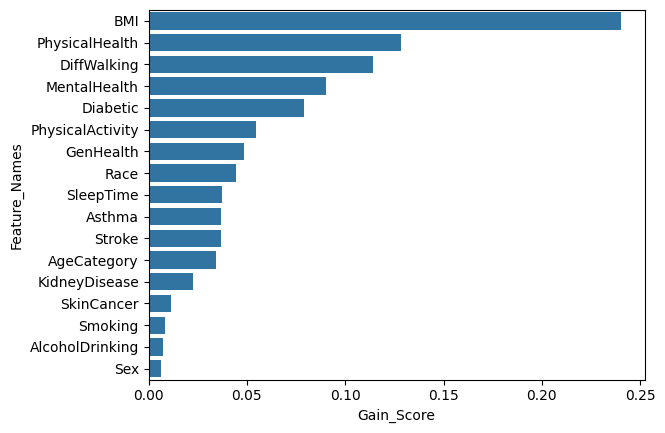

In [37]:
sns.barplot(x='Gain_Score',y='Feature_Names',data=newx)

<Axes: >

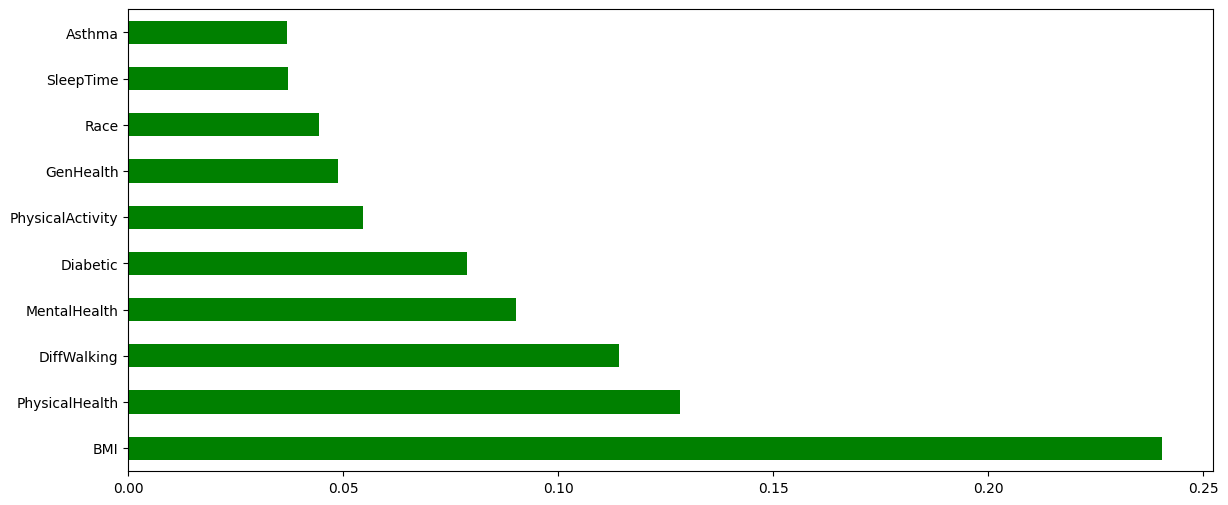

In [38]:
features = pd.Series(extr.feature_importances_, index = x.columns)
plt.figure(figsize=(14,6))
features.nlargest(10).plot(kind='barh', color='g')

In [39]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, f_regression

In [40]:
model2 = SelectKBest(score_func=f_classif)
feature_score = model2.fit(new_x,new_y)
feature_score.scores_

array([3.75440127e+03, 2.03552236e+03, 6.95297966e+02, 4.83533549e+03,
       1.25312036e+04, 6.96957949e+03, 1.36347702e+04, 2.23507248e+02,
       2.12111452e+00, 4.54938853e+03, 9.24225452e+03, 9.11220252e+03,
       1.44917353e+03, 4.00600240e+02, 4.86418830e+03, 3.66576795e+03,
       9.91111023e+02])

In [41]:
cols = pd.DataFrame(feature_score.scores_ , columns=['Feature_Scores'])
cols

,Feature_Scores
0,3754.401268
1,2035.522364
2,695.297966
3,4835.335493
4,12531.203572
5,6969.579494
6,13634.770216
7,223.507248
8,2.121115
9,4549.388533


In [42]:
col2 = pd.DataFrame(new_x.columns, columns=['Feature_Names'])
col2.head()

,Feature_Names
0,BMI
1,Smoking
2,AlcoholDrinking
3,Stroke
4,PhysicalHealth


In [43]:
scores = pd.concat([col2,cols],axis=1)
scores

,Feature_Names,Feature_Scores
0,BMI,3754.401268
1,Smoking,2035.522364
2,AlcoholDrinking,695.297966
3,Stroke,4835.335493
4,PhysicalHealth,12531.203572
5,MentalHealth,6969.579494
6,DiffWalking,13634.770216
7,Sex,223.507248
8,AgeCategory,2.121115
9,Race,4549.388533


In [44]:
new = scores.nlargest(18,'Feature_Scores')
new

,Feature_Names,Feature_Scores
6,DiffWalking,13634.770216
4,PhysicalHealth,12531.203572
10,Diabetic,9242.254520
11,PhysicalActivity,9112.202523
5,MentalHealth,6969.579494
14,Asthma,4864.188299
3,Stroke,4835.335493
9,Race,4549.388533
0,BMI,3754.401268
15,KidneyDisease,3665.767952


Text(0.5, 1.0, 'Xếp hạng tính năng bằng trình phân loại SelectKBest')

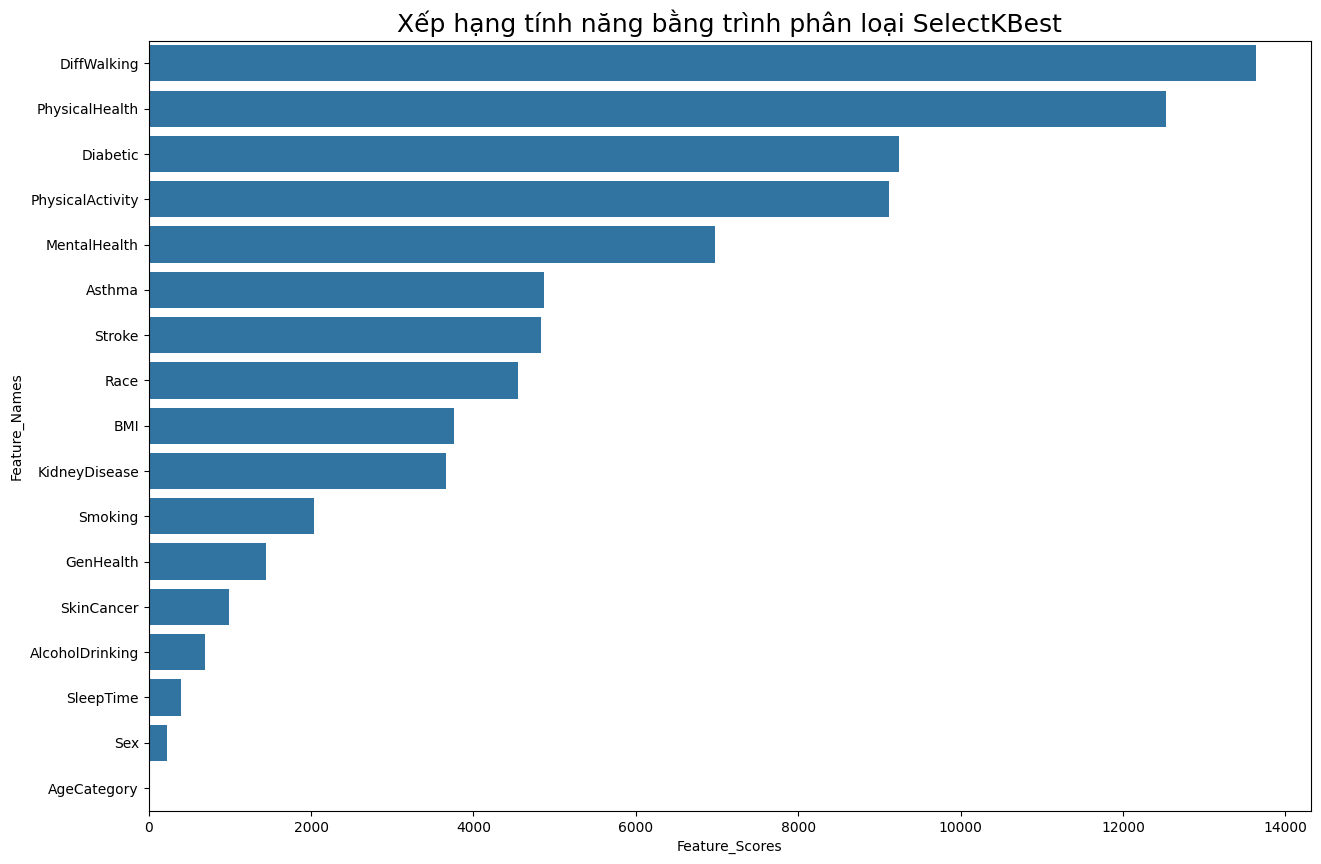

In [45]:
# Tạo biểu đồ bar plot để hiển thị độ quan trọng của các đặc trưng từ mô hình Extra Trees Classifier
plt.figure(figsize=(15,10))
sns.barplot(x='Feature_Scores',y='Feature_Names',data=new)
plt.title('Xếp hạng tính năng bằng trình phân loại SelectKBest',fontsize=18)

# Phân tích thành phần chính

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import plotly.express as pl

# Principal Component Analysis (PCA)

Là một phương pháp giảm số chiều dữ liệu bằng cách tìm các hướng chính của biến động và chuyển đổi dữ liệu sang không gian mới sao cho giữ lại thông tin quan trọng nhất. Điều này giúp giảm kích thước của dữ liệu trong khi vẫn giữ được phần lớn thông tin quan trọng.

In [47]:
mmx = MinMaxScaler()
scaled_x = mmx.fit_transform(new_x)
pca = PCA(n_components=3)
x_pca = pca.fit_transform(scaled_x)
x_pca

array([[-0.66189722,  0.02120726,  0.29702134],
       [-0.25531463, -0.64985735, -0.31890468],
       [-0.37867068,  0.74642353, -0.25386023],
       ...,
       [-0.23145611, -0.65953934, -0.28590515],
       [ 0.30977872,  0.11684293, -0.80242996],
       [ 1.24147672, -0.43432475,  0.48570301]])

In [48]:
features = pd.DataFrame(x_pca, columns=['pca1','pca2','pca3'])
# Biến 'pca1', 'pca2', 'pca3' là ba trục của dữ liệu, và màu sắc của các điểm được xác định bởi giá trị của 'pca1'
pl.scatter_3d(features, x='pca1',y='pca2',z='pca3', color='pca1')

Output hidden; open in https://colab.research.google.com to view.

# Explore Data Analysis (EDA)

<Axes: xlabel='Smoking', ylabel='count'>

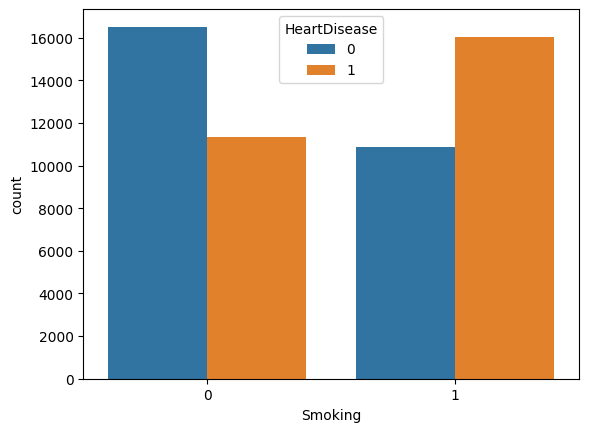

In [49]:
sns.countplot(x='Smoking',hue='HeartDisease',data=df4)

In [50]:
def KDE(x):
    facet=sns.FacetGrid(df4,hue="HeartDisease",aspect=4)
    # Ánh xạ hàm kdeplot của seaborn lên mỗi phần tử của lưới, biểu diễn mật độ phân phối của biến x
    facet.map(sns.kdeplot,x,shade=True)
    # Thiết lập giới hạn trục x dựa trên giá trị tối thiểu và tối đa của biến x trong dataframe df4
    facet.set(xlim=(df4[x].min(),df4[x].max()))
    facet.add_legend()
    plt.show()

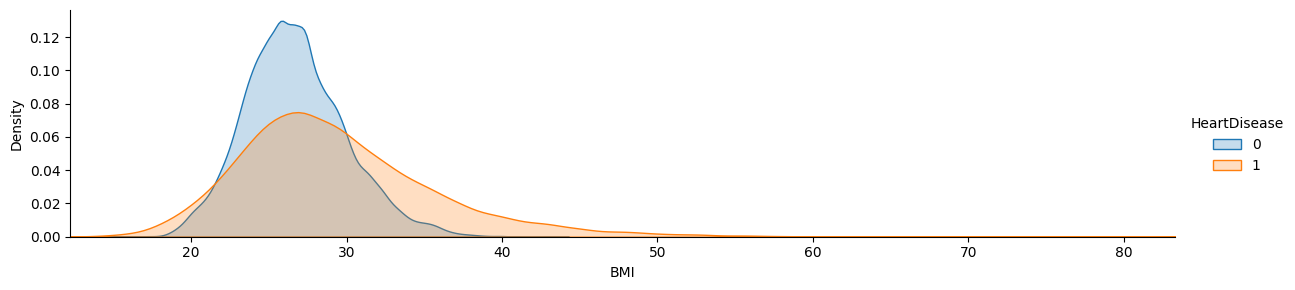

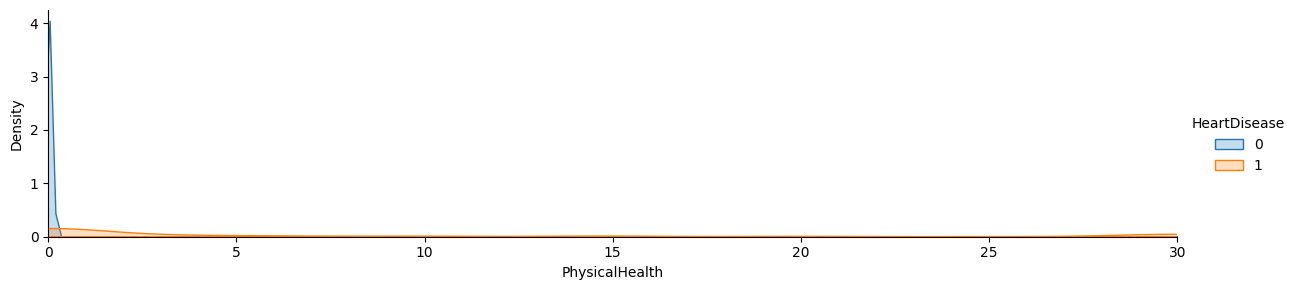

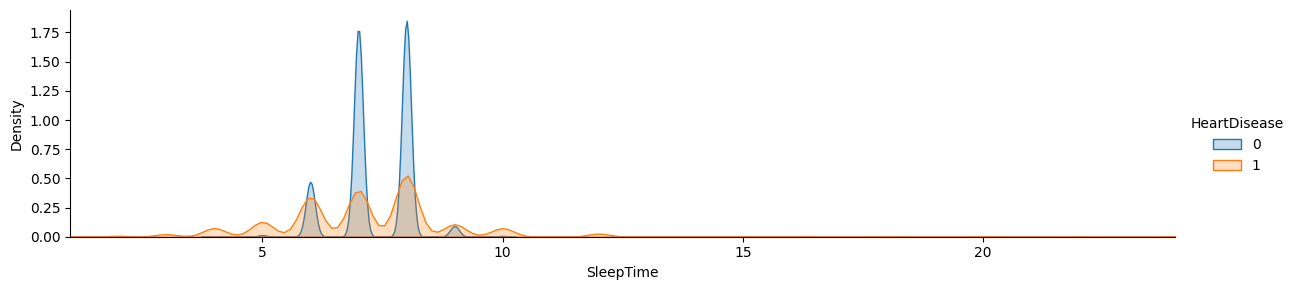

In [51]:
# Mật độ của biến BMI phân biệt theo trạng thái của biến 'HeartDisease'
KDE('BMI')
# Mật độ của biến PhysicalHealth phân biệt theo trạng thái của biến 'HeartDisease'
KDE('PhysicalHealth')
# Mật độ của biến SleepTime phân biệt theo trạng thái của biến 'HeartDisease'
KDE('SleepTime')

In [52]:
df4.corr()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
BMI,1.000000,0.049441,0.014670,0.068767,0.192687,0.145983,0.257873,0.066262,-0.185498,-0.114441,0.293306,-0.210051,-0.031508,-0.067029,0.164275,0.120651,-0.018091,0.253337
Smoking,0.049441,1.000000,0.092053,0.076455,0.133507,0.112300,0.128243,0.101611,0.005786,-0.028858,0.099076,-0.128546,-0.014393,-0.025905,0.067483,0.042515,0.026792,0.189340
AlcoholDrinking,0.014670,0.092053,1.000000,0.024267,0.039746,0.072052,0.026511,0.008041,-0.059917,-0.012962,-0.007564,-0.042995,-0.000983,-0.002374,0.024382,0.000318,0.009680,0.111989
Stroke,0.068767,0.076455,0.024267,1.000000,0.236168,0.171132,0.256971,-0.045099,0.015393,-0.140675,0.169159,-0.172935,-0.067838,-0.018876,0.132583,0.137583,0.043969,0.284882
PhysicalHealth,0.192687,0.133507,0.039746,0.236168,1.000000,0.440993,0.520376,-0.089319,-0.039676,-0.149459,0.264498,-0.365403,-0.082941,-0.105898,0.240992,0.237105,0.053826,0.431588
MentalHealth,0.145983,0.112300,0.072052,0.171132,0.440993,1.000000,0.325887,-0.114732,-0.168178,-0.156602,0.169367,-0.237850,-0.065910,-0.138065,0.209618,0.137120,0.013027,0.336057
DiffWalking,0.257873,0.128243,0.026511,0.256971,0.520376,0.325887,1.000000,-0.134294,0.070244,-0.178967,0.300179,-0.412700,-0.113529,-0.075224,0.245212,0.240233,0.068561,0.446543
Sex,0.066262,0.101611,0.008041,-0.045099,-0.089319,-0.114732,-0.134294,1.000000,-0.114715,0.071277,-0.004047,0.099627,-0.016024,0.018666,-0.100898,-0.046308,0.066207,-0.063767
AgeCategory,-0.185498,0.005786,-0.059917,0.015393,-0.039676,-0.168178,0.070244,-0.114715,1.000000,0.128077,0.034799,-0.061437,0.048086,0.165630,-0.096953,0.046253,0.217923,0.006225
Race,-0.114441,-0.028858,-0.012962,-0.140675,-0.149459,-0.156602,-0.178967,0.071277,0.128077,1.000000,-0.170362,0.143604,0.073850,0.066569,-0.141057,-0.085409,0.079320,-0.276996


<Axes: >

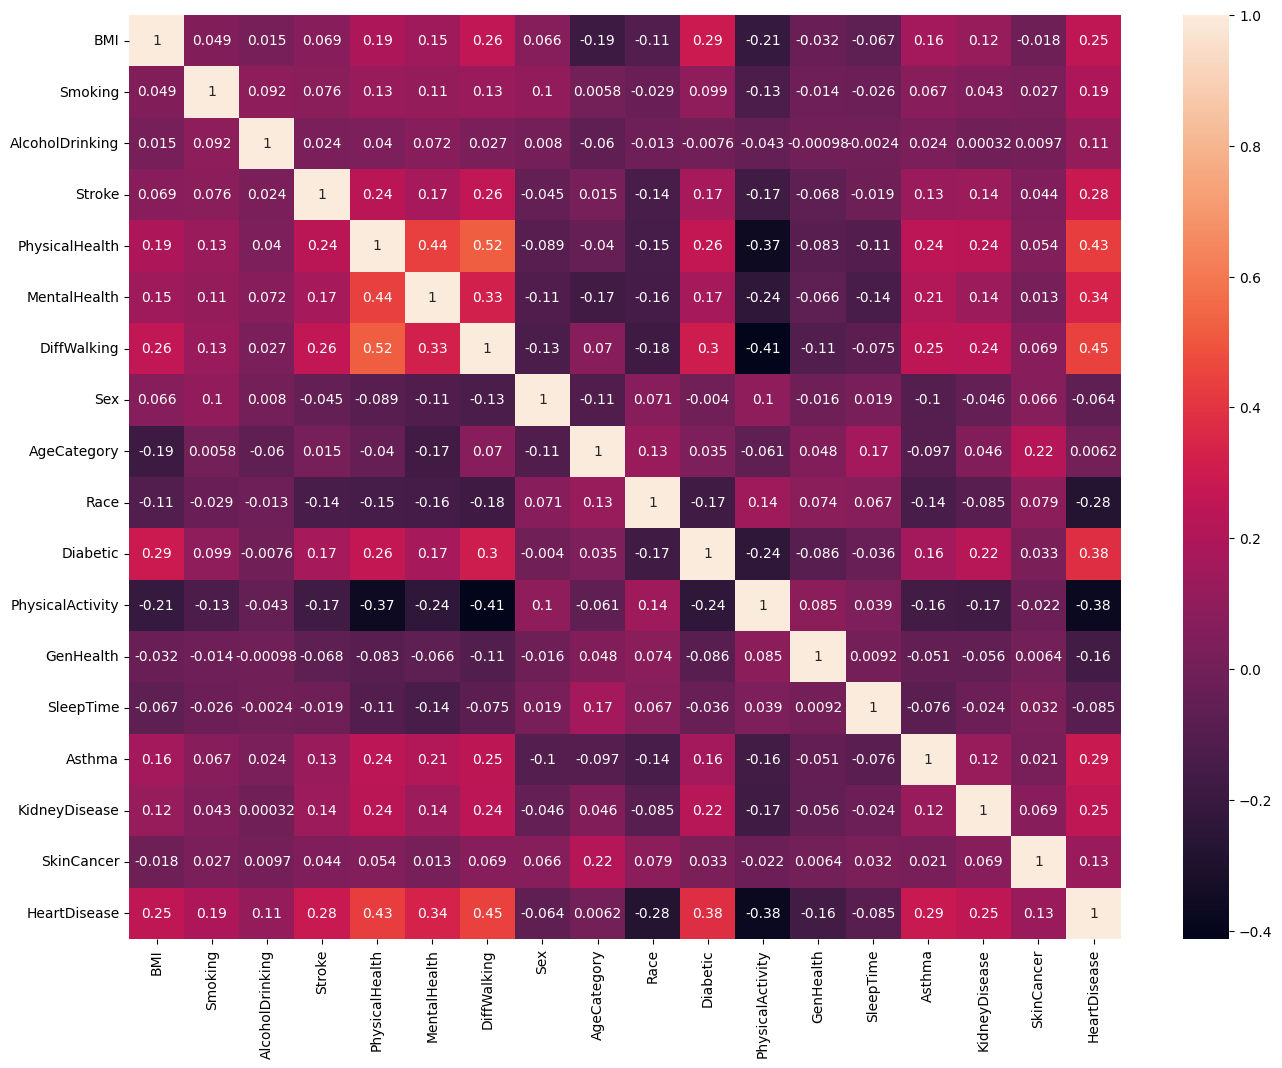

In [53]:
plt.figure(figsize=(16,12))
sns.heatmap(df4.corr(),annot=True)

# Training and Testing

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model 1
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Model 1

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [55]:
X_train,X_test,y_train,y_test=train_test_split(new_x,new_y,train_size=0.75,random_state=42)

In [56]:
X_test.head(50)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
13501,26.54,0,0,0,0,0,0,1,6,5,0,1,0,7,0,0,0
15356,25.46,0,0,0,0,0,0,1,12,5,0,1,2,7,0,0,1
11209,31.63,1,0,0,0,0,0,1,11,5,2,1,4,8,0,0,0
13251,23.63,1,0,0,0,0,0,0,7,5,0,1,4,7,0,0,0
27143,25.62,0,0,0,0,0,0,1,8,5,0,1,2,6,0,0,0
23543,21.80,0,0,0,0,0,0,0,12,5,0,1,4,7,0,0,1
53055,34.33,1,0,0,0,0,1,0,11,5,0,1,3,7,0,1,1
24954,25.80,0,0,0,0,0,0,1,9,4,0,1,4,8,0,0,0
45950,21.52,1,0,0,0,0,0,1,10,5,0,0,4,8,0,0,0
22977,30.04,0,0,0,0,0,0,1,8,5,0,1,0,6,0,0,0


# Logistic Regression
  Là một thuật toán học máy được sử dụng cho các bài toán phân loại. Nó được sử dụng để dự đoán xác suất của một biến phụ thuộc (có hai hoặc nhiều hạng mục) dựa trên một hoặc nhiều biến độc lập.

In [57]:
log = LogisticRegression()
log.fit(X_train, y_train)

# Tính toán độ chính xác của mô hình dự đoán trên dữ liệu kiểm tra
log_pred = log.predict(X_test)
log_score = metrics.accuracy_score(y_test, log_pred)
print("Logistic Regression Accuracy on Test Data:", log_score)

# Tính toán độ chính xác của mô hình dự đoán trên dữ liệu huấn luyện
train_log_pred = log.predict(X_train)
train_log_score = metrics.accuracy_score(y_train, train_log_pred)
print("Logistic Regression Accuracy on Train Data:", train_log_score)

print("Logistic Regression Report:", metrics.classification_report(y_test, log_pred))

Logistic Regression Accuracy on Test Data: 0.8744794330386498
Logistic Regression Accuracy on Train Data: 0.8723544168148274
Logistic Regression Report:               precision    recall  f1-score   support

           0       0.83      0.94      0.88      6825
           1       0.93      0.81      0.87      6862

    accuracy                           0.87     13687
   macro avg       0.88      0.87      0.87     13687
weighted avg       0.88      0.87      0.87     13687



Text(0.5, 1.0, 'Logistic Regression Accuracy Score: 0.8744794330386498')

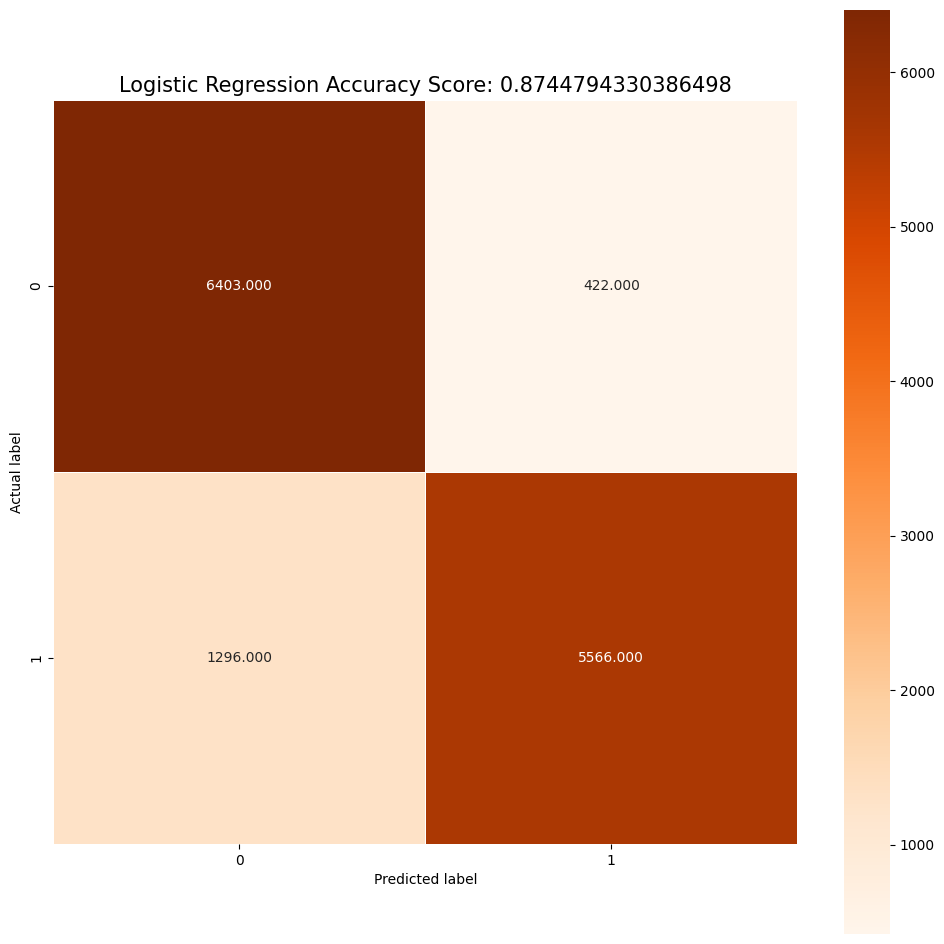

In [58]:
log_cm = metrics.confusion_matrix(y_test, log_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(log_cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Oranges")
ax.set_ylabel("Actual label")
ax.set_xlabel("Predicted label")
title = "Logistic Regression Accuracy Score: {0}".format(log_score)
plt.title(title, size=15)

# Decision Tree Classification
Là một thuật toán học máy được sử dụng trong bài toán phân loại. Thuật toán này hoạt động dựa trên việc xây dựng một cây quyết định từ dữ liệu huấn luyện, trong đó mỗi nút trong cây đại diện cho một biến độc lập, mỗi nhánh là một quyết định dựa trên giá trị của biến đó, và mỗi lá là một lớp hoặc giá trị dự đoán.

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Tính toán độ chính xác của mô hình dự đoán trên dữ liệu kiểm tra
clf_pred = clf.predict(X_test)
clf_score = metrics.accuracy_score(y_test, clf_pred)
print("Decision Tree Classifier Accuracy on Test Data:", clf_score)

# Tính toán độ chính xác của mô hình dự đoán trên dữ liệu huan luyen
train_clf_pred = clf.predict(X_train)
train_clf_score = metrics.accuracy_score(y_train, train_clf_pred)
print("Decision Tree Classifier Accuracy on Train Data:", train_clf_score)

print("Decision Tree Classifier Report:", metrics.classification_report(y_test, clf_pred))

Decision Tree Classifier Accuracy on Test Data: 0.8426974501351647
Decision Tree Classifier Accuracy on Train Data: 0.9830731386541318
Decision Tree Classifier Report:               precision    recall  f1-score   support

           0       0.84      0.85      0.84      6825
           1       0.85      0.83      0.84      6862

    accuracy                           0.84     13687
   macro avg       0.84      0.84      0.84     13687
weighted avg       0.84      0.84      0.84     13687



Text(0.5, 1.0, 'Decision Tree Classifier Accuracy Score: 0.8426974501351647')

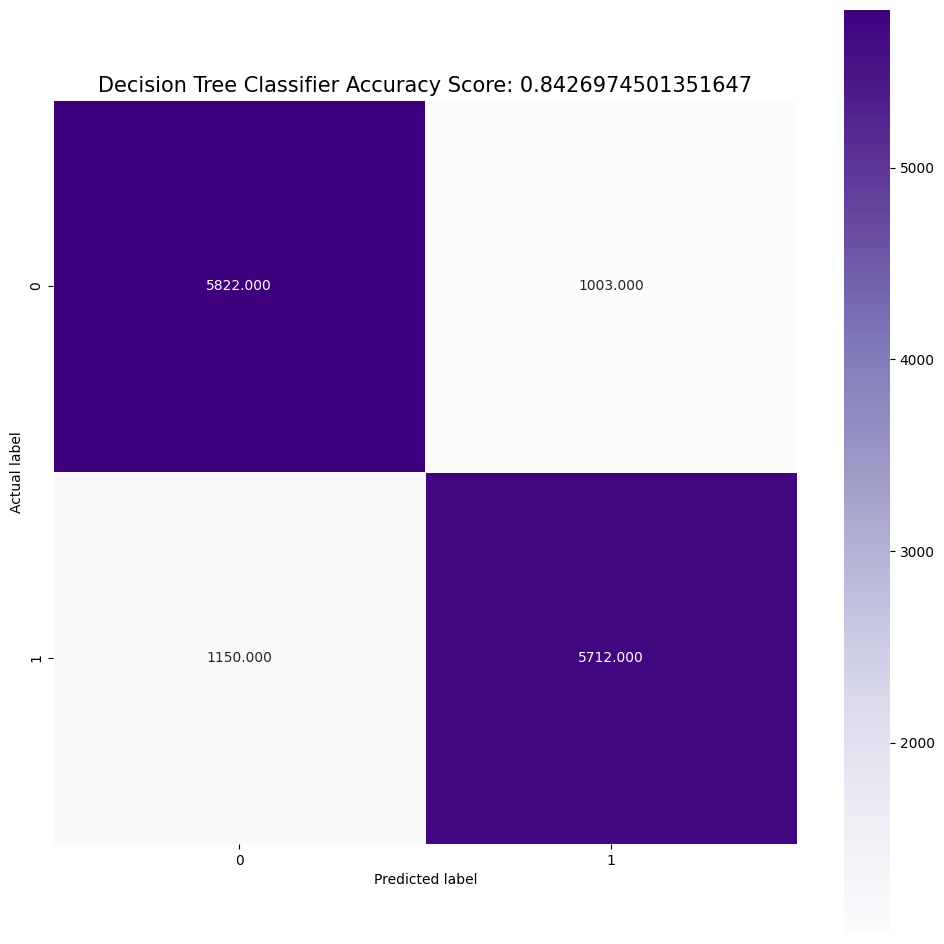

In [60]:
clf_cm = metrics.confusion_matrix(y_test, clf_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(clf_cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Purples")
ax.set_ylabel("Actual label")
ax.set_xlabel("Predicted label")
title = "Decision Tree Classifier Accuracy Score: {0}".format(clf_score)
plt.title(title, size=15)

# XGBoost Classification

In [61]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Tính toán độ chính xác của mô hình dự đoán trên dữ liệu kiểm tra
xgb_pred = xgb.predict(X_test)
xgb_score = metrics.accuracy_score(y_test, xgb_pred)
print("XGBoost Classifier Accuracy on Test Data:", xgb_score)

# Tính toán độ chính xác của mô hình dự đoán trên dữ liệu huan luyen
train_xgb_pred = xgb.predict(X_train)
train_xgb_score = metrics.accuracy_score(y_train, train_xgb_pred)
print("XGBoost Classifier Accuracy on Train Data:", train_xgb_score)
print("XGBoost Classifier Report:", metrics.classification_report(y_test, xgb_pred))

XGBoost Classifier Accuracy on Test Data: 0.8969094761452473
XGBoost Classifier Accuracy on Train Data: 0.9099831949146351
XGBoost Classifier Report:               precision    recall  f1-score   support

           0       0.86      0.94      0.90      6825
           1       0.94      0.85      0.89      6862

    accuracy                           0.90     13687
   macro avg       0.90      0.90      0.90     13687
weighted avg       0.90      0.90      0.90     13687



Text(0.5, 1.0, 'XGBoost Classifier Accuracy Score: 0.8969094761452473')

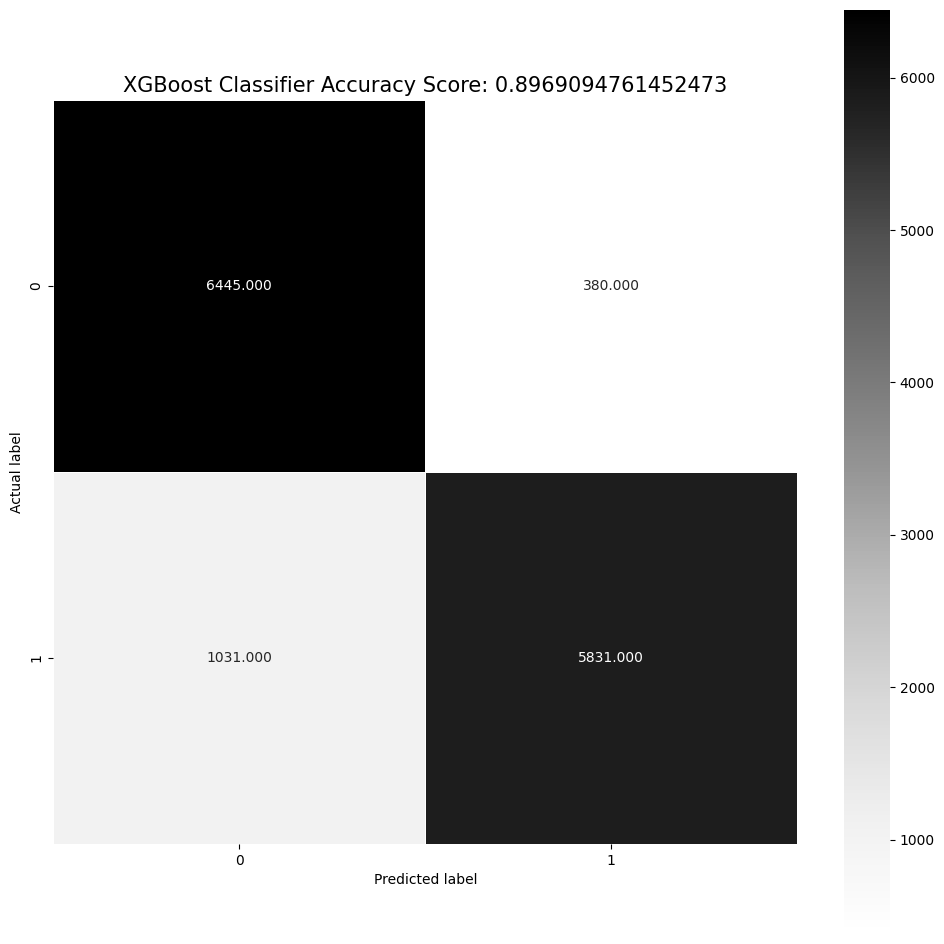

In [62]:
xgb_cm = metrics.confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(xgb_cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Greys")
ax.set_ylabel("Actual label")
ax.set_xlabel("Predicted label")
title = "XGBoost Classifier Accuracy Score: {0}".format(xgb_score)
plt.title(title, size=15)

# Adaboost Classification
Là một thuật toán học máy được sử dụng trong bài toán phân loại. Thuật toán này hoạt động bằng cách xây dựng một chuỗi các mô hình phân loại yếu (weak learners), sau đó kết hợp chúng lại để tạo ra một mô hình phân loại mạnh (strong learner).

In [63]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

# Tính toán độ chính xác của mô hình dự đoán trên dữ liệu kiểm tra
ada_pred = ada.predict(X_test)
ada_score = metrics.accuracy_score(y_test, ada_pred)
print("Adaboost Classifier Accuracy on Test Data:", ada_score)

# Tính toán độ chính xác của mô hình dự đoán trên dữ liệu huan luyen
train_ada_pred = ada.predict(X_train)
train_ada_score = metrics.accuracy_score(y_train, train_ada_pred)
print("Adaboost Classifier Accuracy on Train Data:", train_ada_score)

print("Adaboost Classifier Report:", metrics.classification_report(y_test, ada_pred))

Adaboost Classifier Accuracy on Test Data: 0.889237963030613
Adaboost Classifier Accuracy on Train Data: 0.8889403054141601
Adaboost Classifier Report:               precision    recall  f1-score   support

           0       0.86      0.93      0.89      6825
           1       0.92      0.85      0.88      6862

    accuracy                           0.89     13687
   macro avg       0.89      0.89      0.89     13687
weighted avg       0.89      0.89      0.89     13687



Text(0.5, 1.0, 'Adaboost Classifier Accuracy Score: 0.889237963030613')

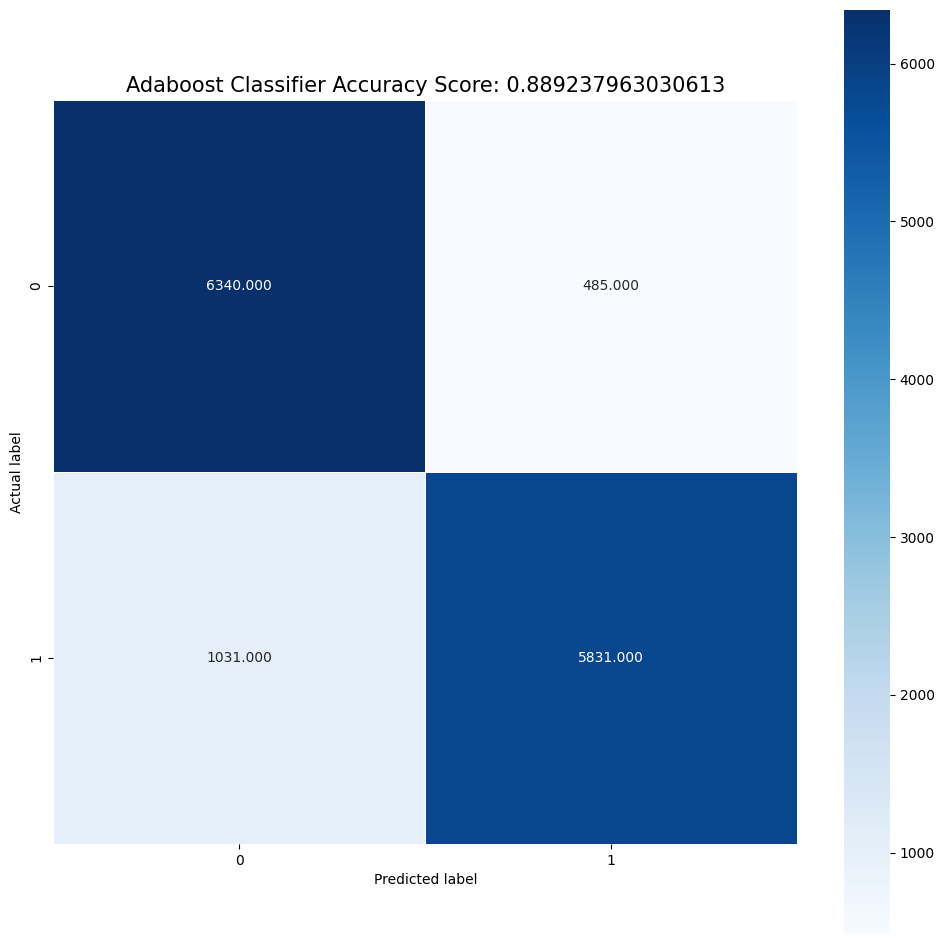

In [64]:
ada_cm = metrics.confusion_matrix(y_test, ada_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(ada_cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Blues")
ax.set_ylabel("Actual label")
ax.set_xlabel("Predicted label")
title = "Adaboost Classifier Accuracy Score: {0}".format(ada_score)
plt.title(title, size=15)

# K Nearest Neighbour Classification:

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import time
from datetime import timedelta


In [66]:
# start_knn = time.time()
# knn_scores = []

# for i in range(1, 12):
#     knc = KNeighborsClassifier(i)
#     knn_pred = knc.fit(X_train, y_train).predict(X_test)
#     knn_scores.append(metrics.accuracy_score(y_test, knn_pred))

# max_knn_score = max(knn_scores)
# knn_score_ind = [i for i, v in enumerate(knn_scores) if v == max_knn_score]
# end_knn = time.time()
# times_knn = timedelta(seconds=round(end_knn - start_knn, 4)).total_seconds()

# print('Time', times_knn)

# knn_score = max_knn_score
# accuracies_max_knn = knn_score
# print("Accuracy", accuracies_max_knn)
# print("Report", metrics.classification_report(y_test, knn_pred))

knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

# Tính toán độ chính xác của mô hình dự đoán trên dữ liệu kiểm tra
knc_pred = knc.predict(X_test)
knc_score = metrics.accuracy_score(y_test, knc_pred)
print("KNearest Classifier Accuracy on Test Data:", knc_score)

# Tính toán độ chính xác của mô hình dự đoán trên dữ liệu huan luyen
train_knc_pred = knc.predict(X_train)
train_knc_score = metrics.accuracy_score(y_train, train_knc_pred)
print("KNearest Classifier Accuracy on Train Data:", train_knc_score)

print("KMearest Classifier Report:", metrics.classification_report(y_test, knc_pred))

KNearest Classifier Accuracy on Test Data: 0.8476656681522613
KNearest Classifier Accuracy on Train Data: 0.8790520957646314
KMearest Classifier Report:               precision    recall  f1-score   support

           0       0.79      0.95      0.86      6825
           1       0.93      0.75      0.83      6862

    accuracy                           0.85     13687
   macro avg       0.86      0.85      0.85     13687
weighted avg       0.86      0.85      0.85     13687



Text(0.5, 1.0, 'K Nearest Neighbour Classification Accuracy Score: 0.8476656681522613')

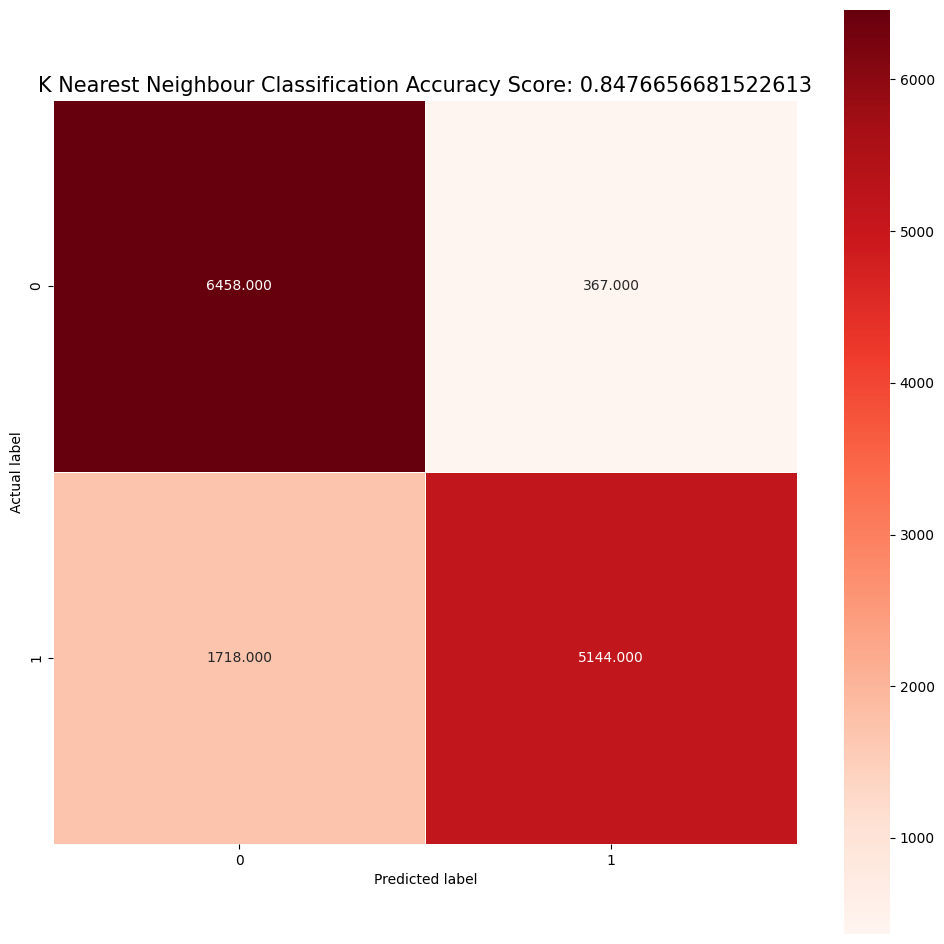

In [67]:
knn_cm = metrics.confusion_matrix(y_test, knc_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(knn_cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Reds")
ax.set_ylabel("Actual label")
ax.set_xlabel("Predicted label")
title = "K Nearest Neighbour Classification Accuracy Score: {0}".format(knc_score)
plt.title(title, size=15)

# Support Vector Machine Classification:

In [68]:
from sklearn.svm import SVC
from sklearn import metrics

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Tính toán độ chính xác của mô hình dự đoán trên dữ liệu kiểm tra
svm_pred = svm.predict(X_test)
svm_score = metrics.accuracy_score(y_test, svm_pred)
print("Support Vector Machine Classification Accuracy on Test Data:", svm_score)

# Tính toán độ chính xác của mô hình dự đoán trên dữ liệu huan luyen
train_svm_pred = svm.predict(X_train)
train_svm_score = metrics.accuracy_score(y_train, train_svm_pred)
print("Support Vector Machine Classification Accuracy on Train Data:", train_svm_score)

print("Support Vector Machine Classification Report:", metrics.classification_report(y_test, svm_pred))

Support Vector Machine Classification Accuracy on Test Data: 0.868196098487616
Support Vector Machine Classification Accuracy on Train Data: 0.8668257872817166
Support Vector Machine Classification Report:               precision    recall  f1-score   support

           0       0.84      0.91      0.87      6825
           1       0.90      0.83      0.86      6862

    accuracy                           0.87     13687
   macro avg       0.87      0.87      0.87     13687
weighted avg       0.87      0.87      0.87     13687



Text(0.5, 1.0, 'Support Vector Machine Classification Accuracy Score: 0.868196098487616')

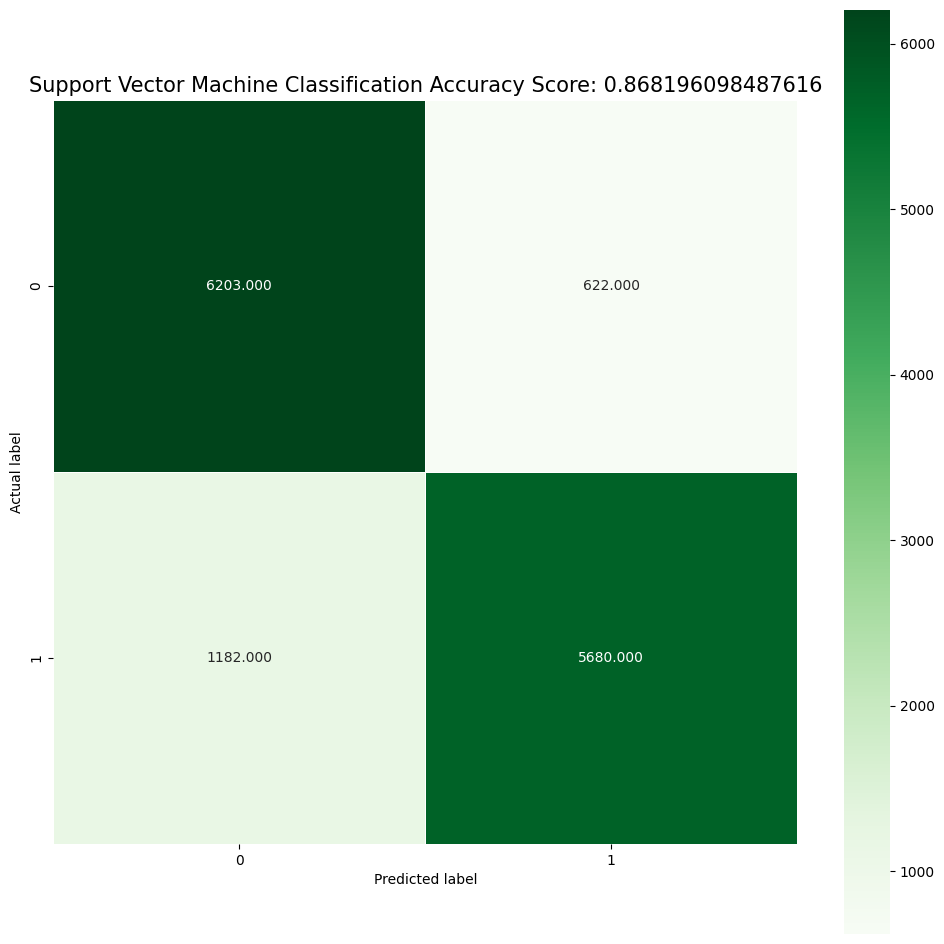

In [69]:
svm_cm = metrics.confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(svm_cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Greens")
ax.set_ylabel("Actual label")
ax.set_xlabel("Predicted label")
title = "Support Vector Machine Classification Accuracy Score: {0}".format(svm_score)
plt.title(title, size=15)

# Random Forest Classification:

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Tính toán độ chính xác của mô hình dự đoán trên dữ liệu kiểm tra
rfc_pred = rfc.predict(X_test)
rfc_score = metrics.accuracy_score(y_test, rfc_pred)
print("Random Forest Classification Accuracy on Test Data:", rfc_score)

# Tính toán độ chính xác của mô hình dự đoán trên dữ liệu huan luyen
train_rfc_pred = rfc.predict(X_train)
train_rfc_score = metrics.accuracy_score(y_train, train_rfc_pred)
print("Random Forest Classification Accuracy on Train Data:", train_rfc_score)

print("Random Forest Classification Report:", metrics.classification_report(y_test, rfc_pred))

Random Forest Classification Accuracy on Test Data: 0.8540951267626214
Random Forest Classification Accuracy on Train Data: 0.9830244282617696
Random Forest Classification Report:               precision    recall  f1-score   support

           0       0.85      0.86      0.86      6825
           1       0.86      0.84      0.85      6862

    accuracy                           0.85     13687
   macro avg       0.85      0.85      0.85     13687
weighted avg       0.85      0.85      0.85     13687



Text(0.5, 1.0, 'Random Forest Classification Accuracy Score: 0.8540951267626214')

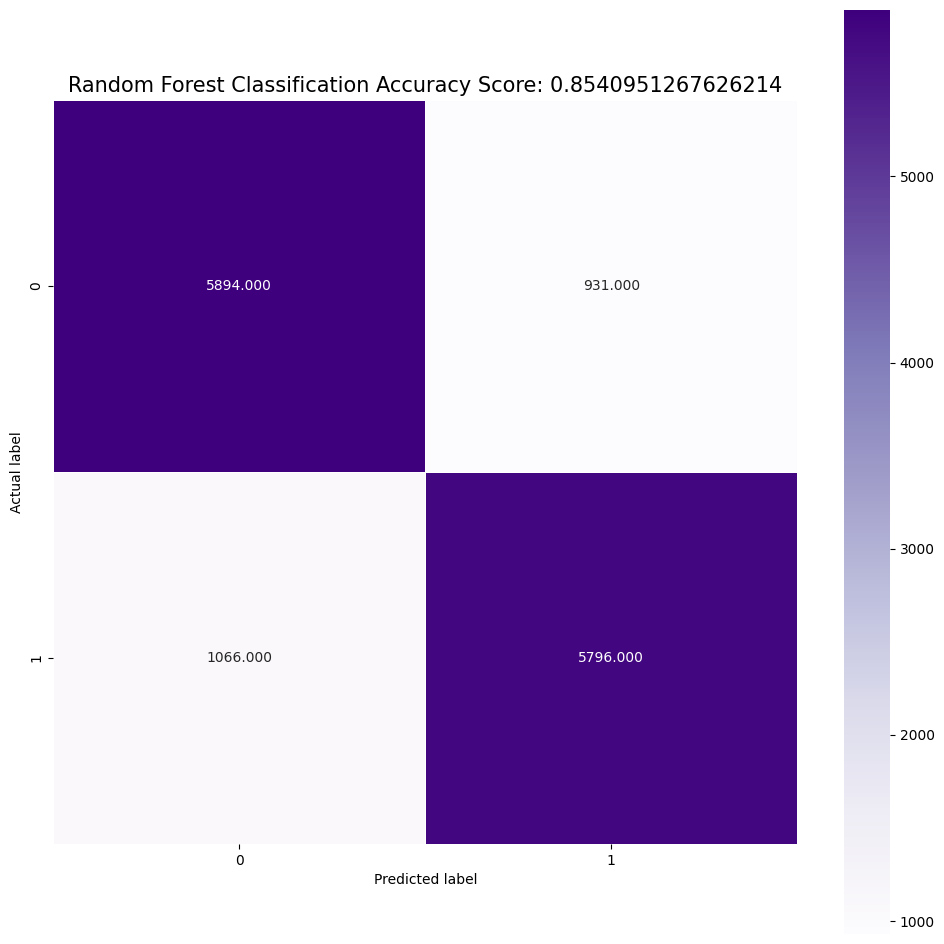

In [71]:
rfc_cm = metrics.confusion_matrix(y_test, rfc_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(rfc_cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Purples")
ax.set_ylabel("Actual label")
ax.set_xlabel("Predicted label")
title = "Random Forest Classification Accuracy Score: {0}".format(rfc_score)
plt.title(title, size=15)

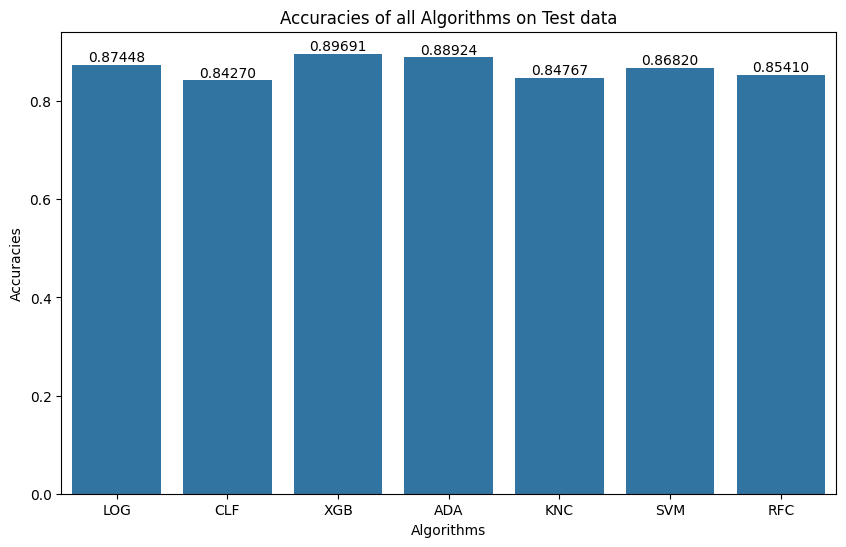

In [72]:
plt.figure(figsize=(10, 6))
plt.xlabel('Algorithms')
plt.ylabel('Accuracies')
plt.title("Accuracies of all Algorithms on Test data")
sns.barplot(x=['LOG', 'CLF', 'XGB', 'ADA', 'KNC', 'SVM', 'RFC'], y=[log_score, clf_score, xgb_score, ada_score, knc_score, svm_score, rfc_score])
# Adding numbers above each bar
for i, score in enumerate([log_score, clf_score, xgb_score, ada_score, knc_score, svm_score, rfc_score]):
    plt.text(i, score, f'{score:.5f}', ha='center', va='bottom')
plt.show()

In [73]:
import pandas as pd

# Dữ liệu test thử

check_acc = {
    'BMI': 16.6,
    'Smoking': 1,
    'AlcoholDrinking': 0,
    'Stroke': 0,
    'PhysicalHealth': 3,
    'MentalHealth': 30,
    'DiffWalking': 0,
    'Sex': 1,
    'AgeCategory': 8,
    'Race': 6,
    'Diabetic': 1,
    'PhysicalActivity': 1,
    'GenHealth': 5,
    'SleepTime': 5,
    'Asthma': 1,
    'KidneyDisease': 0,
    'SkinCancer': 1,
}

df = pd.DataFrame(check_acc, index=[0])

# đưa dữa liệu cho mô hình XGb dự đoán
test_prediction = xgb.predict(df)  # Pass the DataFrame to predict
print(test_prediction)


[1]


# GUI

In [74]:
df4.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,25.10,0,0,0,0,0,0,1,9,5,0,1,4,7,0,0,0,0
1,22.24,1,0,0,0,0,0,1,11,5,0,1,4,7,0,0,0,0
2,26.63,0,0,0,0,0,0,0,12,5,0,1,2,8,0,0,0,0
3,25.10,0,0,0,0,0,0,1,9,5,0,1,4,7,0,0,0,0
4,26.63,0,0,0,0,0,0,0,12,5,0,1,2,8,0,0,0,0


In [75]:
!pip install gradio
import gradio as gr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.4/314.4 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.2 MB/s e

In [76]:
def heart(BMI, Smoking, AlcoholDrinking, Stroke, PhysicalHealth, MentalHealth, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, SleepTime, Asthma, KidneyDisease, SkinCancer):
    HeartDisease = rfc.predict([[BMI, Smoking, AlcoholDrinking, Stroke, PhysicalHealth, MentalHealth, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, SleepTime, Asthma, KidneyDisease, SkinCancer]])

    if HeartDisease == 0:
        return "Bạn không bị bệnh tim"
    elif HeartDisease == 1:
        return "Bạn có nguy cơ bị bệnh tim"
    else:
        return "Kết quả không xác định"

In [77]:
heart(26.54,0,0,0,0,0,0,1,6,5,0,1,0,7,0,0,0)

'Bạn không bị bệnh tim'

In [78]:
interface = gr.Interface(
  fn = heart, #function = heart
  inputs = ['number','number','number','number','number','number','number','number','number',
            'number','number','number','number','number','number','number','number'],
  outputs = ['text']
)
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ede65dcde1fc972820.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
